In [43]:
import pandas as pd

data_orders = pd.read_csv(r'path\to\file.csv')

# Reasons for Cancellation per Driver Assignment

,cancellation_reason,driver_assignment,cancellations
0,client,driver,2811
1,client,no driver,4496
2,system,driver,3
3,system,no driver,3406


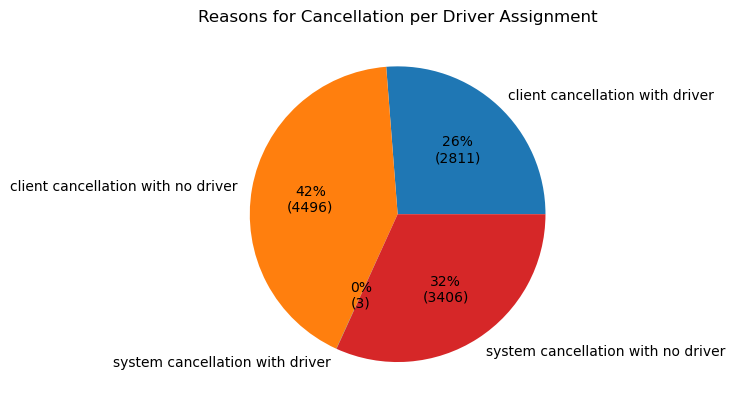

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

data_orders['cancellation_reason'] = np.where(data_orders['order_status_key'] == 4, 'client', 'system')
data_orders['driver_assignment'] = np.where(data_orders['is_driver_assigned_key'] == 1, 'driver', 'no driver')
result = data_orders.groupby(['cancellation_reason', 'driver_assignment']).size().reset_index(name = 'cancellations')

def auto_pct_format(pct, values):
    absolute_value = int(round(pct * sum(values)/100))
    return f'{pct:.0f}%\n({absolute_value})'

labels = result['cancellation_reason'] + ' cancellation with ' + result['driver_assignment']
plt.pie(result['cancellations'], labels = labels, autopct = lambda pct: auto_pct_format(pct, result['cancellations']))
plt.title('Reasons for Cancellation per Driver Assignment')

display(result)
plt.show()

# Cancellations per Hour

,hour,cancellations
0,0,683
1,1,471
2,2,555
3,3,513
4,4,152
5,5,67
6,6,159
7,7,447
8,8,1082
9,9,412


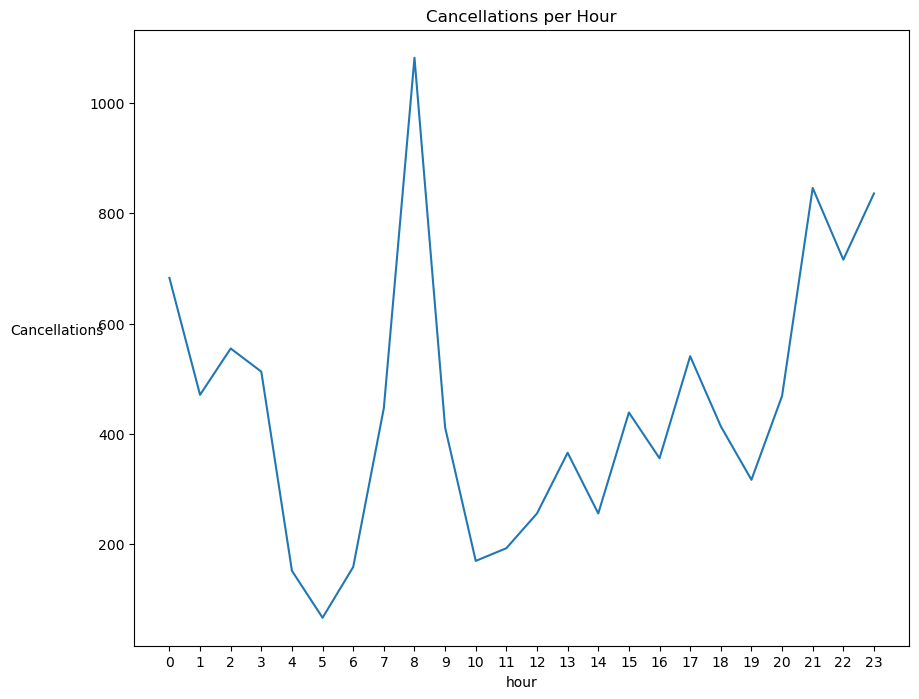

In [41]:
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])
result = data_orders.groupby(data_orders['order_datetime'].dt.hour).size().reset_index(name = 'cancellations').rename(columns = {'order_datetime':'hour'})

fig, ax = plt.subplots(figsize = (10, 8))
plt.plot(result['hour'], result['cancellations'])
plt.title('Cancellations per Hour')
plt.xlabel('hour')
plt.xticks(result['hour'])
ax.set_ylabel('Cancellations', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.1, .5)

display(result)
plt.show()

# Average Time to Cancellation in Seconds per Hour and Driver Assignment

In [33]:

data_orders['hour'] = data_orders['order_datetime'].dt.hour
result = data_orders.groupby(['driver_assignment', 'hour'])['cancellations_time_in_seconds'].mean().round().reset_index(name = 'average_time_to_cancellation_seconds')

display(result)

,driver_assignment,hour,average_time_to_cancellation_seconds
0,driver,0,294.0
1,driver,1,248.0
2,driver,2,303.0
3,driver,3,293.0
4,driver,4,243.0
5,driver,5,314.0
6,driver,6,273.0
7,driver,7,189.0
8,driver,8,189.0
9,driver,9,216.0


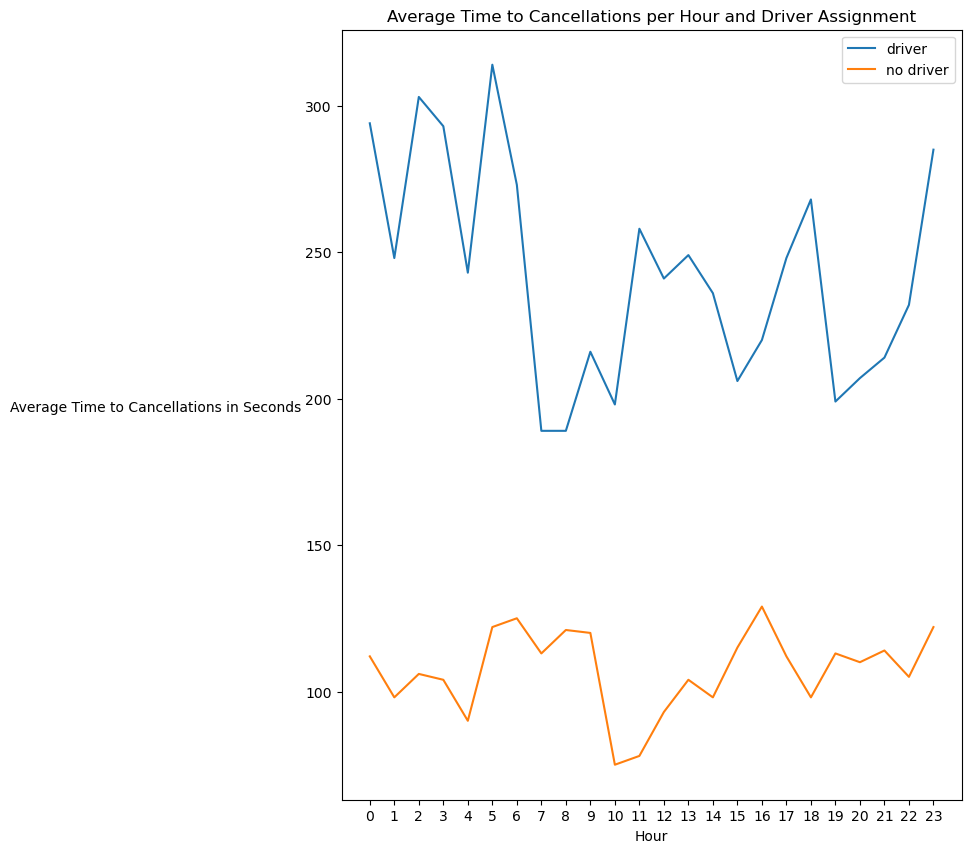

In [34]:
with_driver = result[result['driver_assignment'] == 'driver']
no_driver = result[result['driver_assignment'] == 'no driver']

fig, ax = plt.subplots(figsize = (8, 10))
plt.plot(with_driver['hour'], with_driver['average_time_to_cancellation_seconds'], label = 'driver')
plt.plot(no_driver['hour'], no_driver['average_time_to_cancellation_seconds'], label = 'no driver')
plt.title('Average Time to Cancellations per Hour and Driver Assignment')
plt.xlabel('Hour')
plt.xticks(with_driver['hour'])
ax.set_ylabel('Average Time to Cancellations in Seconds', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.3, .5)
plt.legend()

plt.show()

# Average ETA per Hour

,hour,average_eta
0,0,358.0
1,1,325.0
2,2,391.0
3,3,388.0
4,4,300.0
5,5,411.0
6,6,427.0
7,7,583.0
8,8,637.0
9,9,505.0


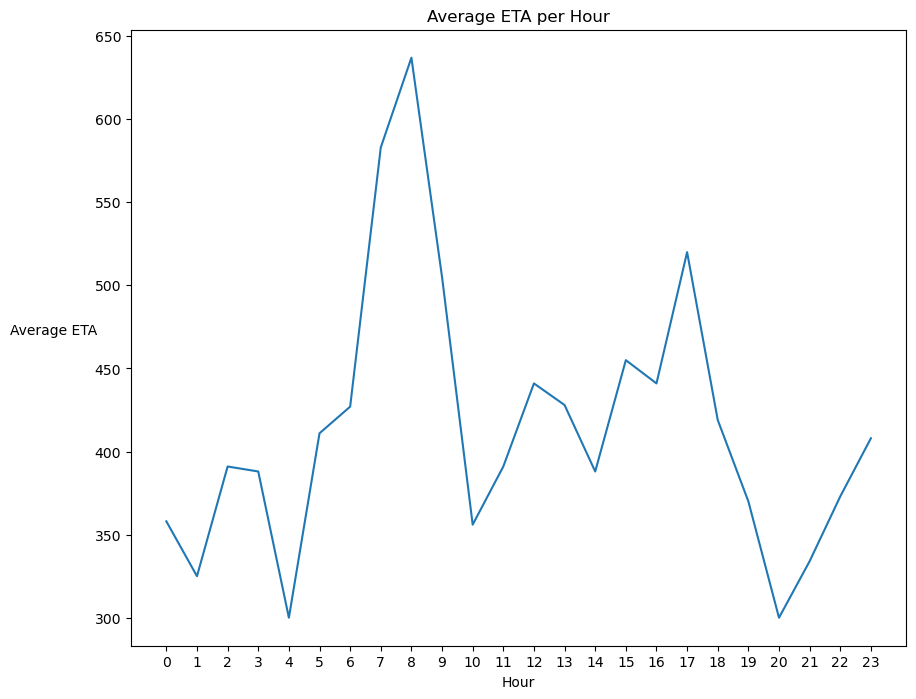

In [42]:
result = data_orders.groupby('hour')['m_order_eta'].mean().reset_index(name = 'average_eta').round()

fig, ax = plt.subplots(figsize = (10, 8))
plt.plot(result['hour'], result['average_eta'])
plt.title('Average ETA per Hour')
plt.xlabel('Hour')
plt.xticks(result['hour'])
ax.set_ylabel('Average ETA', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.1, .5)

display(result)
plt.show()